In [143]:
from os import path,getcwd
import pandas as pd
import numpy as np

from scipy import stats

import statsmodels.api as sm
from bioinfokit.analys import stat
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import pearsonr
from fitter import Fitter


from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"

- 1. Verificar se as amostras seguem uma Distribuição Normal, Se pertencem a mesma distribuição e se são Independentes. Plotar os gráficos.

- 2. DESAFIO: Inserir as estatísticas de Média e Desvio Padrão no gráfico


In [144]:
path.root = path.join(getcwd(),'..')
path.data = path.join(path.root,'data')
path.output = path.join(path.data,'output')
path.input = path.join(path.data,'input')

In [145]:
lista_estados = ['Chicago', 'HarrisburgScranton', 'Pittsburgh','Boise', 'LosAngeles', 'LasVegas', 'Atlanta','DallasFtWorth', 'MiamiFtLauderdale','StLouis','Syracuse', 'Sacramento', 'Boston', 'Charlotte','Spokane', 'Albany', 'Houston', 'SanFrancisco','RaleighGreensboro', 'BuffaloRochester','GrandRapids', 'Denver', 'SanDiego','BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Louisville', 'Seattle','CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis','Jacksonville', 'Columbus', 'Detroit', 'Philadelphia','PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield','Tampa', 'Orlando',]
lista_regioes = ['Southeast', 'Plains',  'Midsouth', 'NorthernNewEngland', 'Northeast', 'SouthCentral', 'GreatLakes', 'West','WestTexNewMexico',]

In [146]:
path_read = path.join(path.input,'avocado.csv')

names = ['date','average_price','total_volume','PLU_4046','PLU_4225','PLU_4770','total_bags','small_bags','large_bags','XLarge_bags','type','year','region']

dtypes = {
    'total_volume':np.int64,
    'PLU_4046':np.int64,
    'PLU_4225':np.int64,
    'PLU_4770':np.int64,
    'total_bags':np.int64,
    'small_bags':np.int64,
    'large_bags':np.int64,
    'XLarge_bags':np.int64
}


df = pd.read_csv(
        path_read,
        index_col=0,
        names=names,
        header=0,
        parse_dates=['date'],
)

df = df.astype(dtypes)

df = df.sort_values(
            by='date',
            ignore_index=True
)

df

,date,average_price,total_volume,PLU_4046,PLU_4225,PLU_4770,total_bags,small_bags,large_bags,XLarge_bags,type,year,region
0,2015-01-04,1.75,27365,9307,3844,615,13598,13061,537,0,organic,2015,Southeast
1,2015-01-04,1.49,17723,1189,15628,0,905,905,0,0,organic,2015,Chicago
2,2015-01-04,1.68,2896,161,206,0,2528,2528,0,0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956,3013,35456,1561,14925,11264,3660,0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505,1,1129,0,374,186,187,0,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-03-25,1.36,908202,142681,463136,174975,127409,103579,22467,1362,conventional,2018,Chicago
18245,2018-03-25,0.70,9010588,3999735,966589,30130,4014132,3398569,546409,69152,conventional,2018,SouthCentral
18246,2018-03-25,1.42,163496,29253,5080,0,129163,109052,20111,0,organic,2018,SouthCentral
18247,2018-03-25,1.70,190257,29644,70982,0,89631,89424,207,0,organic,2018,California


# Parte 4

In [147]:
mask = (df.type == 'conventional') & (df.region =='TotalUS')

df_average_price   =  df.loc[mask, 'average_price']


df_analise, df_validacao = train_test_split(df_average_price,test_size=0.3)
   
df_amostra_1 = df_analise.sample(frac=0.3).reset_index(drop=True)
df_amostra_2 = df_analise.sample(frac=0.3).reset_index(drop=True)
df_amostra_3 = df_analise.sample(frac=0.3).reset_index(drop=True)

amostras = [df_amostra_1,df_amostra_2,df_amostra_3]

df_amostras = pd.concat(amostras,axis=1)

df_amostras.columns = ['amostra_1','amostra_2','amostra_3']

df_melt = pd.melt(df_amostras.reset_index(),id_vars=['index'])

df_melt.columns = ['index', 'amostras', 'value']

df_melt

,index,amostras,value
0,0,amostra_1,0.95
1,1,amostra_1,1.31
2,2,amostra_1,0.95
3,3,amostra_1,0.98
4,4,amostra_1,0.89
...,...,...,...
100,30,amostra_3,1.03
101,31,amostra_3,1.13
102,32,amostra_3,1.03
103,33,amostra_3,1.15


In [148]:
fig = go.Figure()

fig = px.box(
    df_melt,
    y='value',
    color='amostras',
    
)

fig.add_trace(
    go.Box(
        y=df_validacao,
        name='validação'
    )
)


fig.show()

In [149]:
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(amostras)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(amostras),2.0,0.079145,0.039572,1.021652,0.363654
Residual,102.0,3.950840,0.038734,NaN,NaN


In [150]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='value',xfac_var='amostras', anova_model='value ~ C(amostras)')
res.tukey_summary


C:\Python\python310_x64\lib\site-packages\bioinfokit\analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,amostra_1,amostra_2,0.067143,-0.044759,0.179045,2.018316,0.331397
1,amostra_1,amostra_3,0.036857,-0.075045,0.148759,1.107927,0.696779
2,amostra_2,amostra_3,0.030286,-0.081616,0.142187,0.910389,0.776408


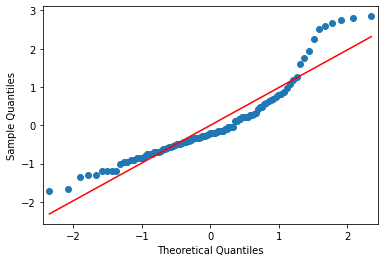

In [152]:
qqplot_data = qqplot(res.anova_std_residuals, line='s').gca().lines

In [153]:
fig = make_subplots(rows=1,cols=2)

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
#    'width': 800,
    'height': 700,
})

fig.add_trace(
    go.Histogram(
        x=res.anova_model_out.resid
    ),row=1,col=2
)

fig.show()


In [154]:
fig = ff.create_distplot(
    [df_amostra_1,df_amostra_2,df_amostra_3,df_validacao],
    group_labels=['amostra 1','amostra 2','amostra 3','validacao'],
    bin_size=.1,
    show_rug=False,
    colors = px.colors.qualitative.Pastel
)

fig.update_layout(
    height = 800
)

fig.show()

In [155]:
for df_amostra in amostras:
    stat, p = ttest_ind(df_validacao, df_amostra)

    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Provavelmente a mesma distribuição\n')
    else:
        print('Provavelmentes as distribuições são diferentes\n')
 

stat=0.339, p=0.736
Provavelmente a mesma distribuição

stat=-1.483, p=0.142
Provavelmente a mesma distribuição

stat=-0.694, p=0.490
Provavelmente a mesma distribuição



In [156]:
for df_amostra in amostras_com_validacao:
    stat, p = shapiro(df_amostra)

    print('stat=%.3f, p=%.3f' % (stat, p))

    if p > 0.05:
        print('Provavelmente uma Distribuição Normal\n')
    else:
        print('Provavelmente NÃO é uma Distribuição Normal\n')


stat=0.937, p=0.046
Provavelmente NÃO é uma Distribuição Normal

stat=0.839, p=0.000
Provavelmente NÃO é uma Distribuição Normal

stat=0.921, p=0.015
Provavelmente NÃO é uma Distribuição Normal

stat=0.890, p=0.000
Provavelmente NÃO é uma Distribuição Normal



In [157]:
for df_amostra in [df_amostra_2,df_amostra_3]:
    stat, p = pearsonr(df_amostra_1, df_amostra)

    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Provavelmente Independente\n')
    else:
        print('Provavelmente Dependente\n')



stat=-0.130, p=0.456
Provavelmente Independente

stat=0.025, p=0.888
Provavelmente Independente

